# Date time Variable analysis

Helpful for EDA

# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# first install: pip install version_information
%reload_ext version_information
%version_information math, numpy, pandas,matplotlib

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
math The 'math' distribution was not found and is required by the application
numpy 1.16.0
pandas 0.24.1
matplotlib 3.0.2
Sat Oct 05 23:08:16 2019 W. Europe Daylight Time

# 2)- Loading data file

In [4]:
# taking 1000 random samples out of bug dataset

data = pd.read_csv('loan.csv').sample(10000, random_state=44) 

In [5]:
data.shape

(10000, 145)

In [6]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,2500,C,Dec-2018,debt_consolidation,Feb-2019
1,30000,D,Dec-2018,debt_consolidation,Feb-2019
2,5000,D,Dec-2018,debt_consolidation,Feb-2019
3,4000,D,Dec-2018,debt_consolidation,Feb-2019
4,30000,C,Dec-2018,debt_consolidation,Feb-2019


In [7]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

,Data Type
loan_amnt,int64
grade,object
issue_d,object
purpose,object
last_pymnt_d,object


Data type with int and float are numerical while data type with object is categorical variable.

Only look close to issue_d and last_pymnt_d. They are also shown as "object". It will be a mistake to continue like this. Convert em into date_time 

In [8]:
data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

In [9]:
table_dtype = _tbl_dtype(data)
table_dtype

,Data Type
loan_amnt,int64
issue_dt,datetime64[ns]
last_pymnt_dt,datetime64[ns]
grade,object
issue_d,object
purpose,object
last_pymnt_d,object


### check difference

In [10]:
data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


We can see that year, month and day format is now as per our requirement

# 3)- Checking Lending Club issue situation as per year

In [11]:
issue_year=data['issue_dt'].dt.year

In [12]:
issue_year[:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: issue_dt, dtype: int64

In [13]:
data['issue_year']=data['issue_dt'].dt.year

In [14]:
d=data

In [15]:
data.groupby(data.issue_year).size()

issue_year
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134814
2014    235629
2015    421095
2016    434407
2017    443579
2018    495242
dtype: int64

They are already sorted. If not then we can do manually

### alternative approach

In [16]:
data.issue_year.value_counts().sort_index()

2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134814
2014    235629
2015    421095
2016    434407
2017    443579
2018    495242
Name: issue_year, dtype: int64

In [17]:
data.issue_year.value_counts(ascending=True).sort_index()

2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134814
2014    235629
2015    421095
2016    434407
2017    443579
2018    495242
Name: issue_year, dtype: int64

In [18]:
dist=data.issue_year.value_counts(ascending=True).sort_index()

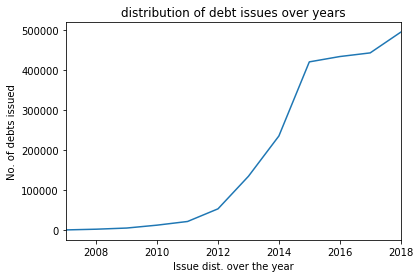

In [19]:
dist.plot()
plt.xlabel('Issue dist. over the year')
plt.ylabel('No. of debts issued')
plt.title('distribution of debt issues over years')
#plt.legend()
plt.show()

From 2012 , we can a sharp increase which becomes consistent from 2014 - 2016. Eventually, there is a linear rise at start of 2017 uptill 2018

### For all days, months and years

In [26]:
dist2=data.issue_dt.value_counts(ascending=True).sort_index()
dist2[:10]

2007-06-01     24
2007-07-01     63
2007-08-01     74
2007-09-01     53
2007-10-01    105
2007-11-01    112
2007-12-01    172
2008-01-01    305
2008-02-01    306
2008-03-01    402
Name: issue_dt, dtype: int64

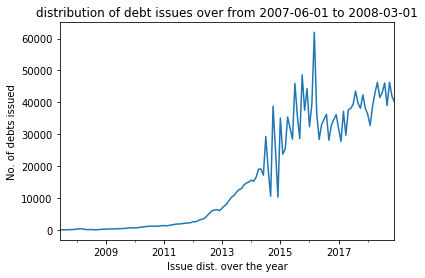

In [27]:
dist2.plot()
plt.xlabel('Issue dist. over the year')
plt.ylabel('No. of debts issued')
plt.title('distribution of debt issues over from 2007-06-01 to 2008-03-01')
#plt.legend()
plt.show()

# 4)- Distribution of money lending from risk market

Risk markets have been given grade with A being best and E,F,G being at risky side.

In [20]:
d=data

In [21]:
# let's see how much money Lending Club has disbursed (i.e., lent) over the years to the different risk markets (grade variable)

d.grade.value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

In [22]:
d=d.groupby(["issue_year","grade"])['loan_amnt'].sum()
d[:5]

issue_year  grade
2007        A         391200
            B         817100
            C        1166875
            D         792550
            E         813825
Name: loan_amnt, dtype: int64

In [23]:
d=d.unstack("grade")
d[:5]

grade,A,B,C,D,E,F,G
issue_year,,,,,,,
2007,391200,817100,1166875,792550,813825,616250,379675
2008,1982575,5449775,5127250,3759325,2561825,1236275,1002225
2009,8700675,15695475,13182425,8700125,3665175,1328225,656150
2010,24824350,40253325,27447875,20708000,11791925,4570050,2397025
2011,51657300,74656100,48099400,37321675,31071225,14562175,4315950


Text(0, 0.5, 'Disbursed Amount (US Dollars)')

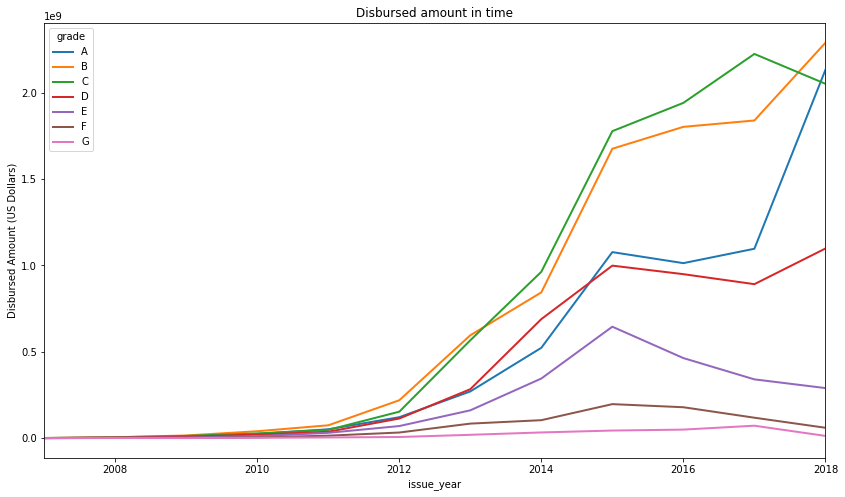

In [24]:
fig=d.plot(figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

In [ ]:
If we want to include days, months and years then we may include full "data.issue_dt"

Text(0, 0.5, 'Disbursed Amount (US Dollars)')

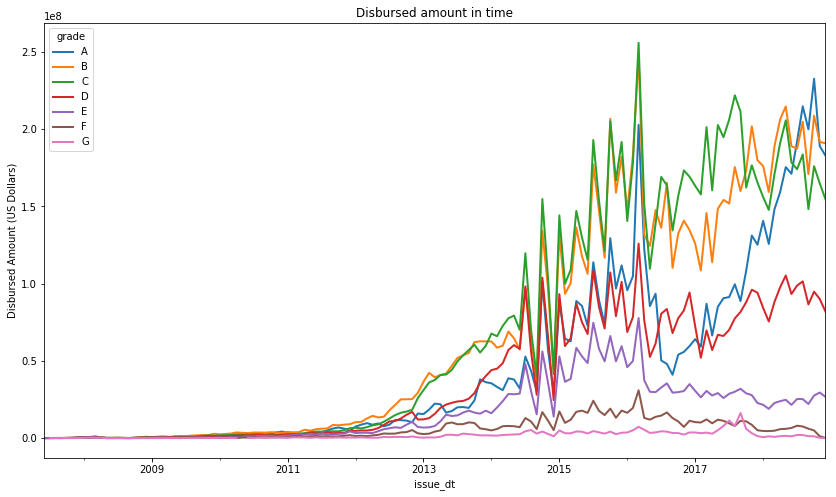

In [25]:
fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

In [29]:
data.columns

Index(['loan_amnt', 'grade', 'issue_d', 'purpose', 'last_pymnt_d', 'issue_dt',
       'last_pymnt_dt', 'issue_year'],
      dtype='object')

In [30]:
data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'house', 'car', 'other',
       'vacation', 'home_improvement', 'small_business', 'major_purchase',
       'medical', 'renewable_energy', 'moving', 'wedding', 'educational'],
      dtype=object)

In [31]:
data.purpose.value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

# 5)- Purpose distribution over the years

In [34]:
c=data

In [39]:
c=c.groupby(["issue_year","purpose"]).sum()
c[:5]

issue_year  purpose           
2007        car                     91425.0
            credit_card            732125.0
            debt_consolidation    1879325.0
            educational            221025.0
            home_improvement       254200.0
dtype: float64

In [40]:
c=c.unstack("purpose")
c[:5]

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
issue_year,,,,,,,,,,,,,,
2007,91425.0,732125.0,1879325.0,221025.0,254200.0,53750.0,90200.0,69950.0,67200.0,556275.0,0.0,894675.0,17100.0,50225.0
2008,293200.0,3412875.0,9383825.0,563575.0,1277800.0,267475.0,638925.0,312400.0,162475.0,2545275.0,29500.0,1771600.0,83150.0,377175.0
2009,1515075.0,6364775.0,24367150.0,1189025.0,4042600.0,694950.0,1900850.0,626350.0,355400.0,4861950.0,89350.0,4394425.0,179850.0,1346500.0
2010,2863850.0,18205750.0,68689300.0,822775.0,9843525.0,1189700.0,6611525.0,1672375.0,1506275.0,10889425.0,322600.0,5759675.0,584800.0,3030975.0
2011,6154375.0,34899475.0,144057250.0,0.0,21031625.0,3154750.0,9434625.0,3456075.0,2056850.0,16278475.0,473425.0,14390700.0,1309375.0,4986825.0


Text(0, 0.5, 'Distribution of purpose Amount')

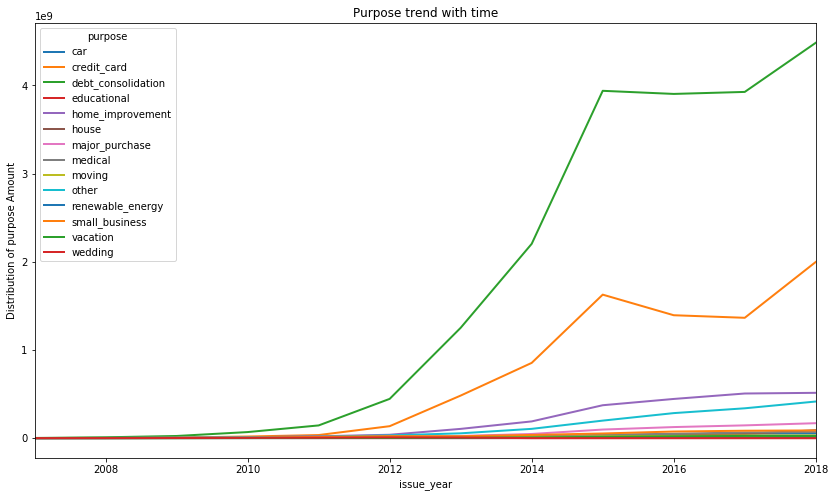

In [41]:
fig=c.plot(figsize=(14, 8), linewidth=2)

fig.set_title('Purpose trend with time')
fig.set_ylabel('Distribution of purpose Amount')